In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix, 
    roc_curve, 
    roc_auc_score
)
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from datetime import datetime

In [35]:
# Load the dataset
df = pd.read_csv('IEEE_DRDO_data.csv')

In [36]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10872 entries, 0 to 10871
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Vehicle Type         10872 non-null  object 
 1   Vehicle ID           10872 non-null  object 
 2   Purchase Timestamp   10872 non-null  object 
 3   Usage Hours          10872 non-null  int64  
 4   Performance Metrics  10872 non-null  float64
 5   Maintenance Logs     10872 non-null  int64  
 6   Number of Failures   10872 non-null  int64  
 7   Parts with Issues    5479 non-null   object 
 8   State                10872 non-null  object 
 9   Area                 10872 non-null  object 
 10  Battalion            10872 non-null  object 
 11  Temperature          10872 non-null  int64  
 12  Weather Conditions   10872 non-null  object 
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [37]:
df.head()

,Vehicle Type,Vehicle ID,Purchase Timestamp,Usage Hours,Performance Metrics,Maintenance Logs,Number of Failures,Parts with Issues,State,Area,Battalion,Temperature,Weather Conditions
0,Type E,V-872,2018-08-25,6645,96.62,10,1,Sensors,Assam,Plains,Gorkha Rifles,10,Clear Skies
1,Type C,V-229,2023-05-30,914,92.39,29,0,Navigation System,Jammu & Kashmir,Mountainous,Punjab Regiment,9,Extreme Cold
2,Type D,V-502,2017-12-11,4107,96.15,37,2,NaN,Sikkim,Mountainous,Assam Rifles,-2,Foggy
3,Type A,V-807,2015-07-21,5635,74.80,36,0,NaN,Sikkim,Mountainous,Punjab Regiment,-8,Snowfall
4,Type C,V-142,2024-08-11,3949,65.06,37,8,NaN,Nagaland,Jungle,Kumaon Regiment,26,Humid


In [38]:
# Identify numerical and categorical columns
num_cols = ['Usage Hours', 'Performance Metrics', 'Maintenance Logs', 'Number of Failures', 'Temperature']
cat_cols = ['Vehicle Type', 'State', 'Area', 'Battalion', 'Weather Conditions']

In [39]:
# Convert numerical columns to proper numeric types
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

In [40]:
# Check for missing values in numerical columns
print(df[num_cols].isnull().sum())

Usage Hours            0
Performance Metrics    0
Maintenance Logs       0
Number of Failures     0
Temperature            0
dtype: int64


In [41]:
# Set style for better visualization
sns.set_style("whitegrid")

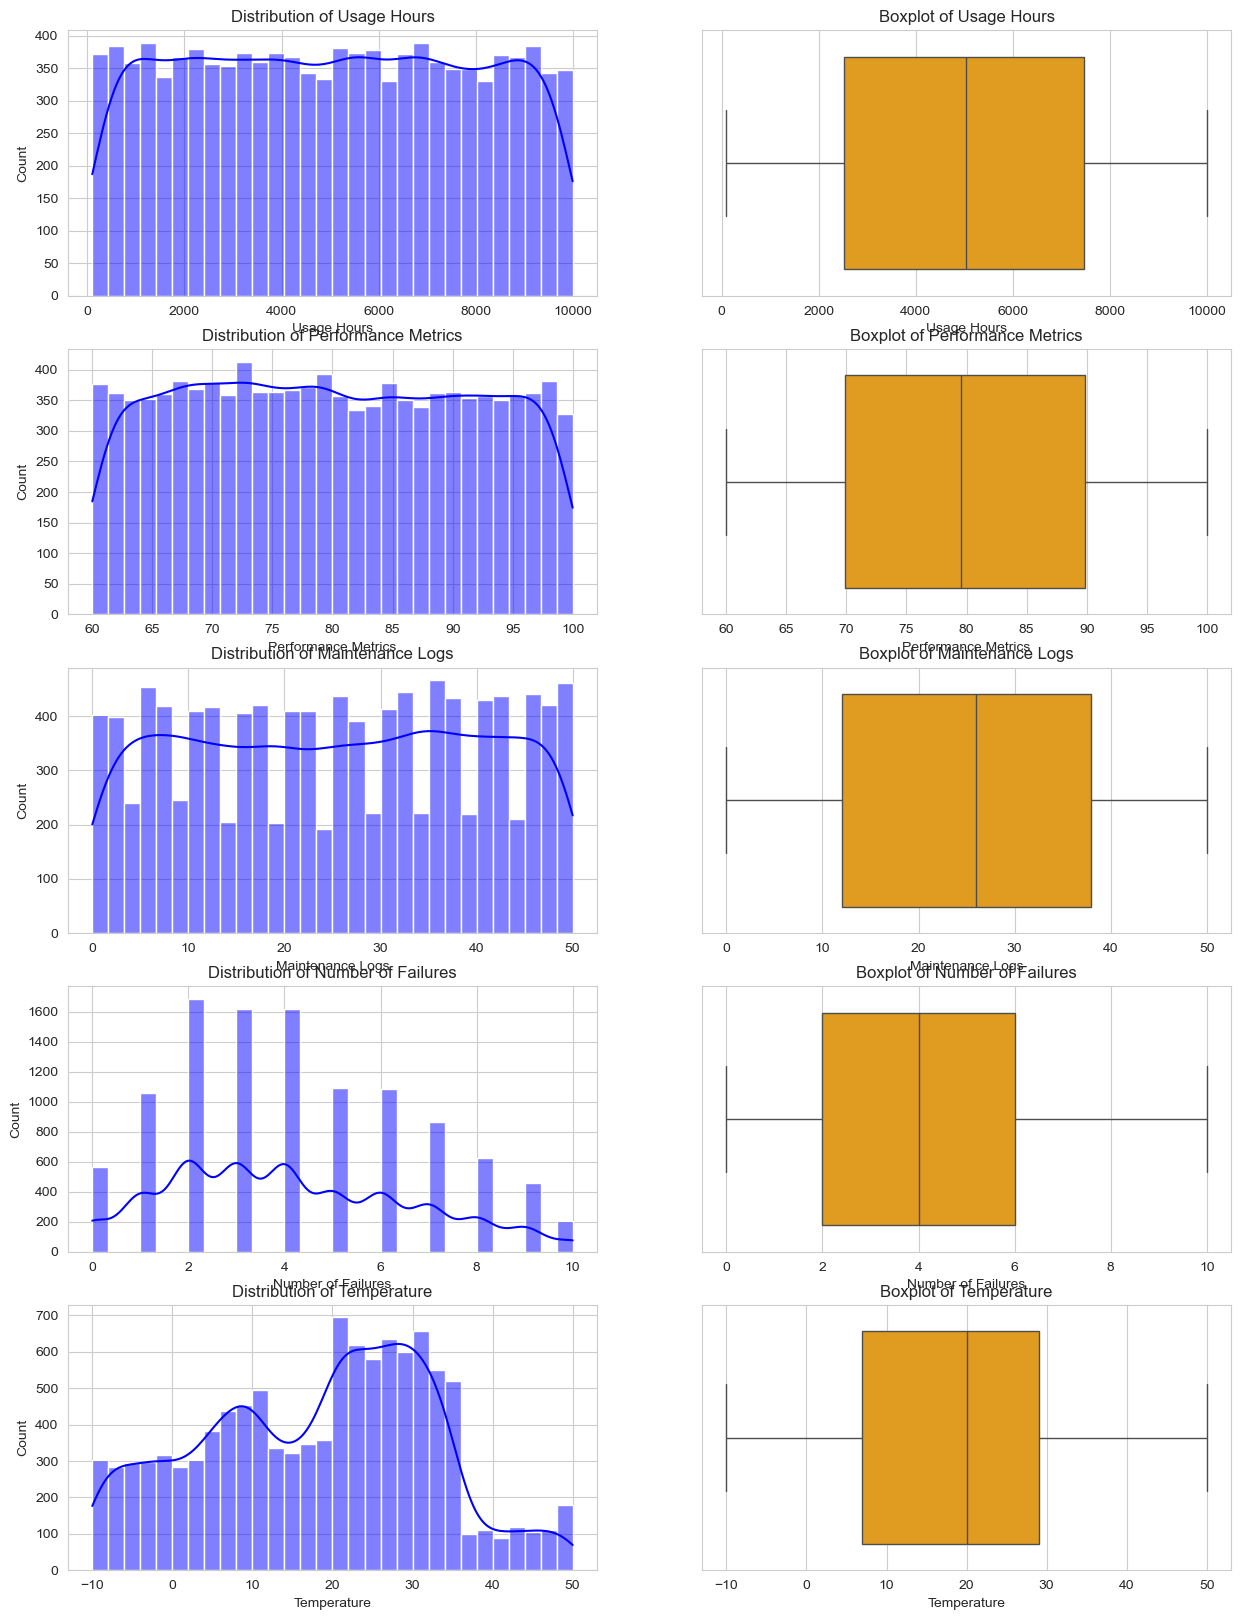

In [42]:
# Histograms and Boxplots for numerical columns
fig, axes = plt.subplots(len(num_cols), 2, figsize=(15, 20))
for i, col in enumerate(num_cols):
    # Histogram
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i, 0], color='blue')
    axes[i, 0].set_title(f"Distribution of {col}")

    # Boxplot
    sns.boxplot(x=df[col], ax=axes[i, 1], color='orange')
    axes[i, 1].set_title(f"Boxplot of {col}")

C:\Users\sukal\AppData\Local\Temp\ipykernel_15980\700512654.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, ax=axes[i, 0], palette="viridis")
C:\Users\sukal\AppData\Local\Temp\ipykernel_15980\700512654.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, ax=axes[i, 0], palette="viridis")
C:\Users\sukal\AppData\Local\Temp\ipykernel_15980\700512654.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().ind

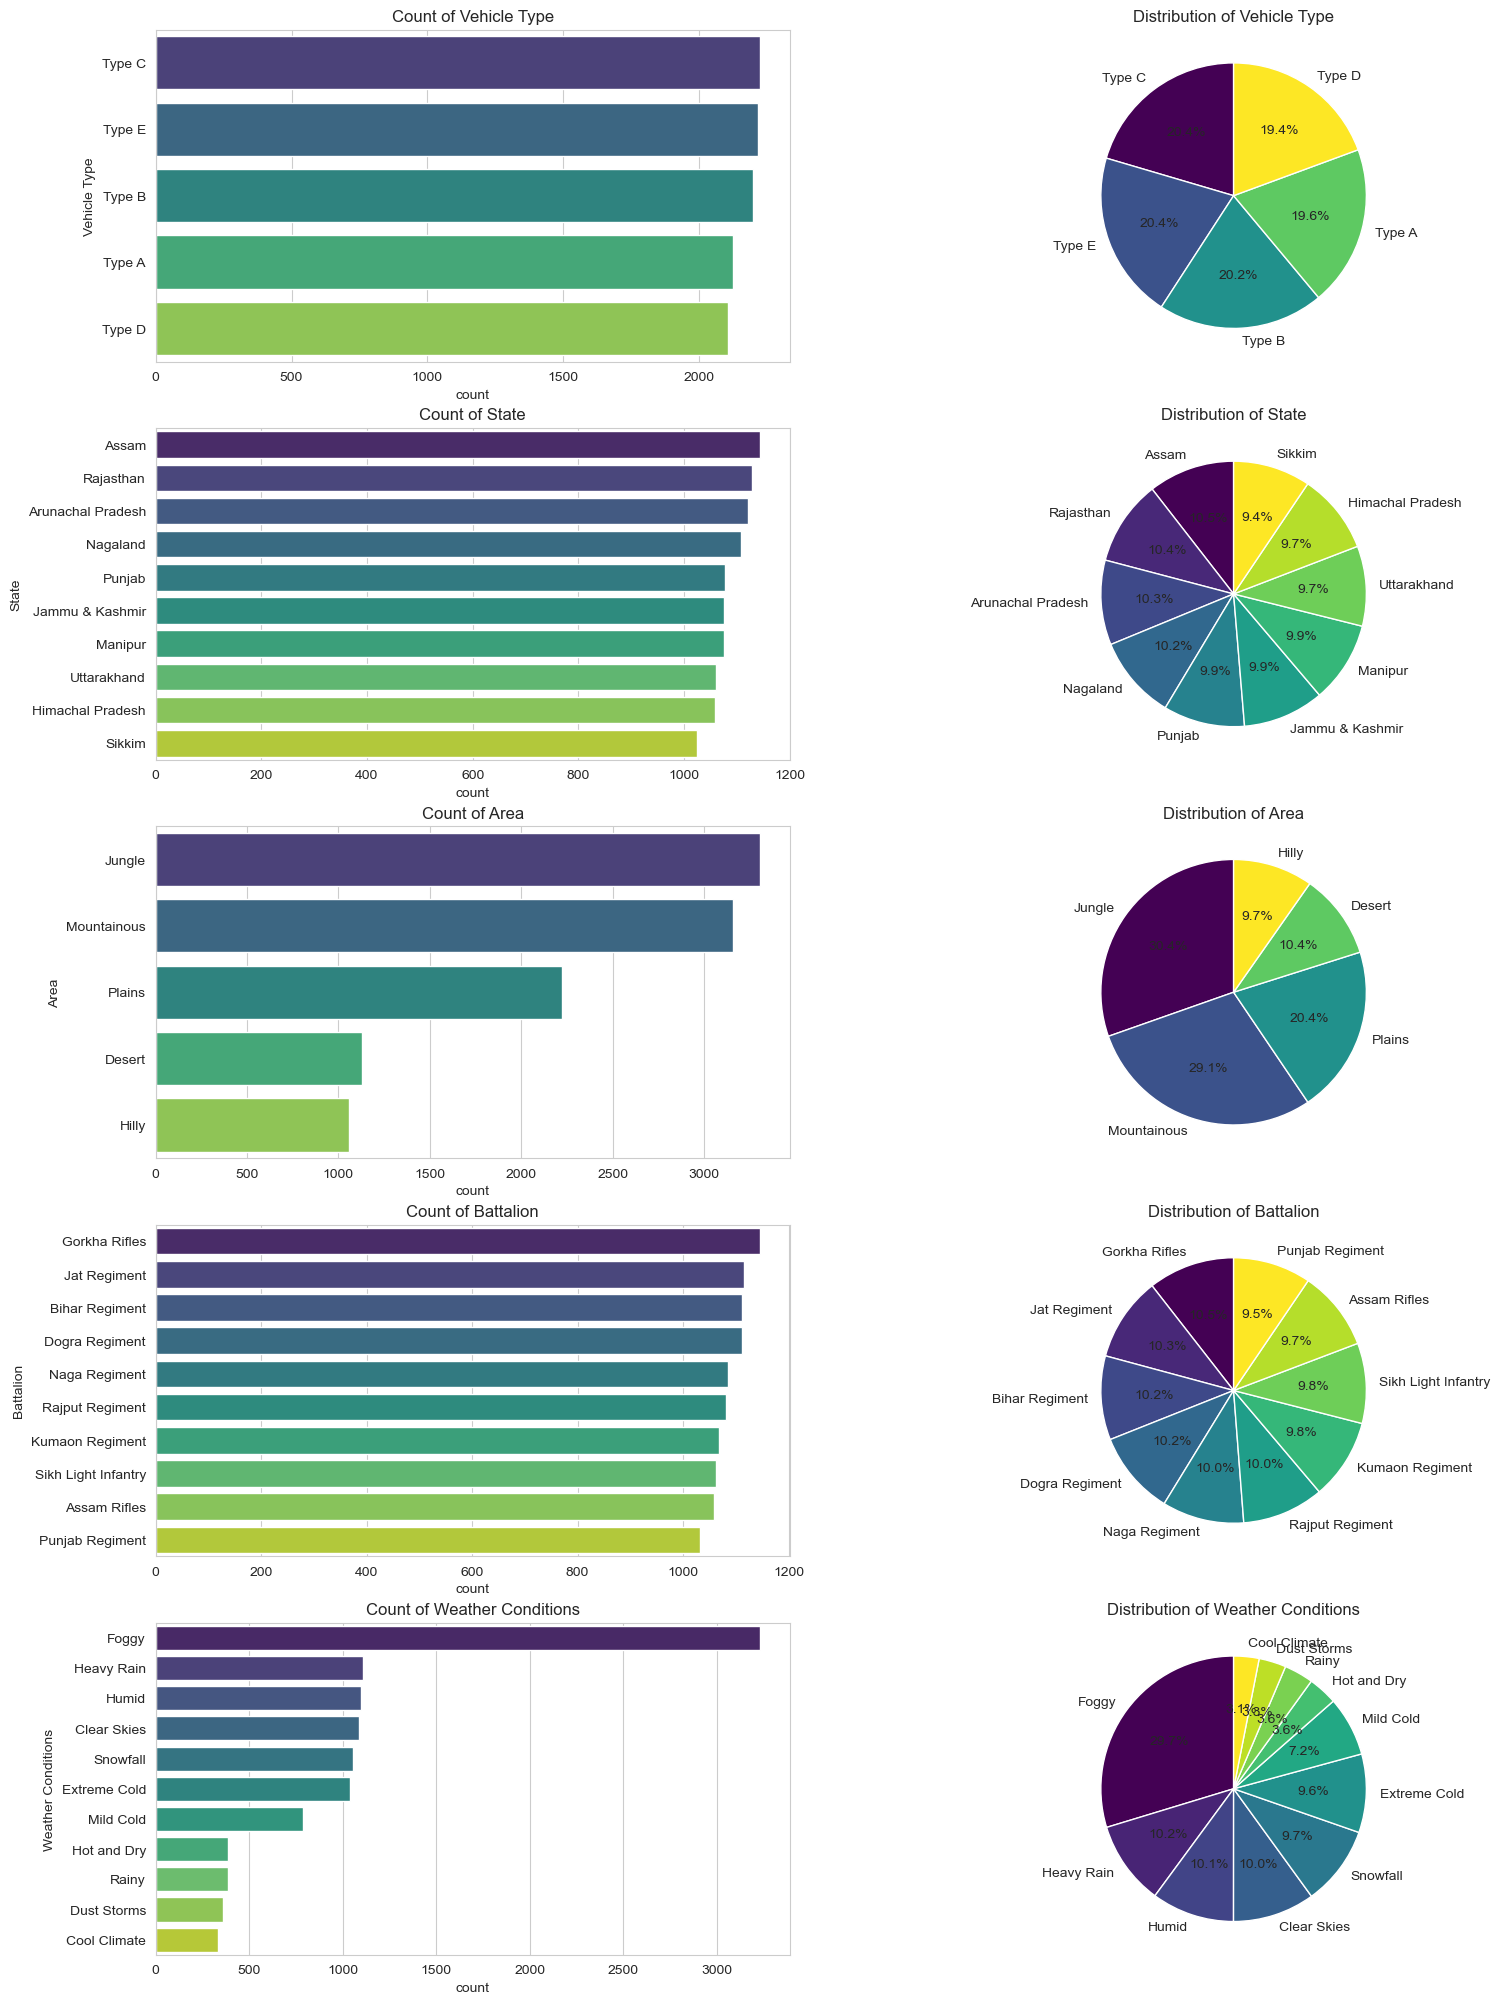

In [43]:
# Bar charts and Pie charts for categorical columns
fig, axes = plt.subplots(len(cat_cols), 2, figsize=(18, 25))
for i, col in enumerate(cat_cols):
    # Bar chart
    sns.countplot(y=df[col], order=df[col].value_counts().index, ax=axes[i, 0], palette="viridis")
    axes[i, 0].set_title(f"Count of {col}")
    
    # Pie chart
    df[col].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[i, 1], cmap="viridis", startangle=90)
    axes[i, 1].set_ylabel("")
    axes[i, 1].set_title(f"Distribution of {col}")

C:\Users\sukal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\sukal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\sukal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\sukal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\sukal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\sukal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because n

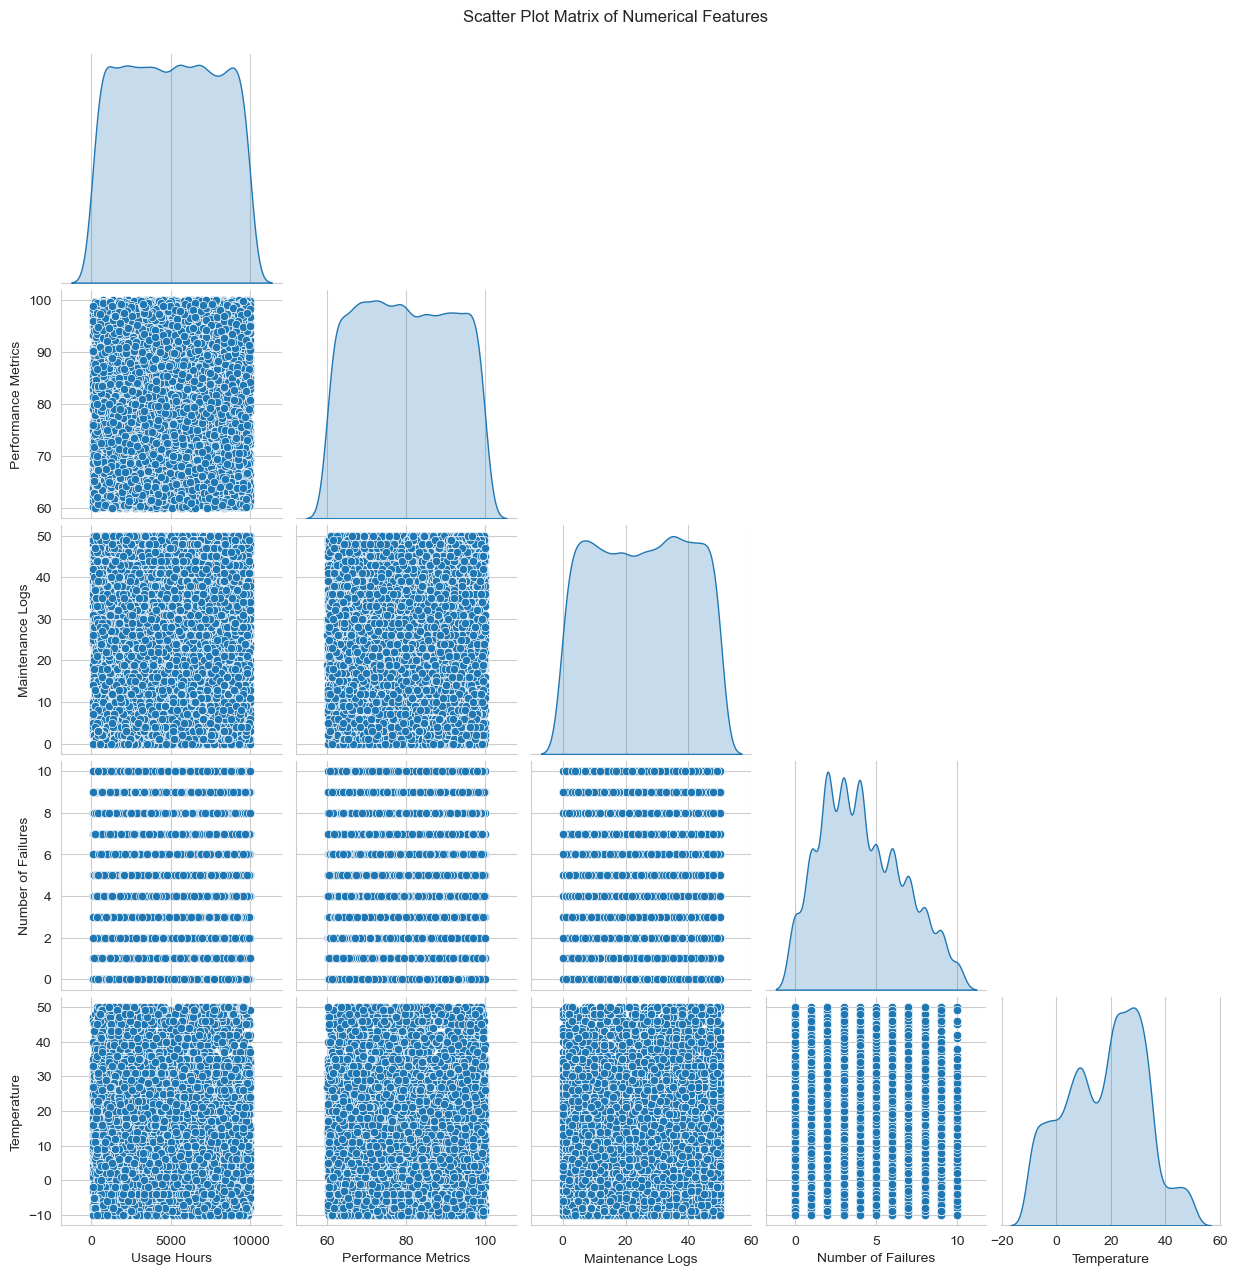

In [44]:
# Scatter plots for relationships between numerical variables
sns.pairplot(df[num_cols], diag_kind='kde', corner=True, palette='coolwarm')
plt.suptitle("Scatter Plot Matrix of Numerical Features", y=1.02)
plt.show()

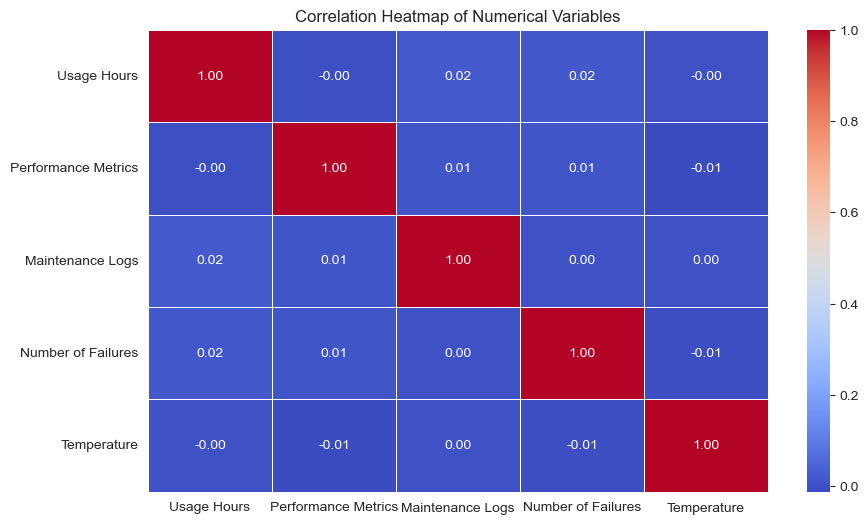

In [45]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

In [46]:
# Preprocessing function
def preprocess_data(df):
    # Create a copy of the dataframe
    data = df.copy()
    
    # Convert Purchase Timestamp to numerical features
    data['Purchase_Year'] = pd.to_datetime(data['Purchase Timestamp']).dt.year
    data['Purchase_Month'] = pd.to_datetime(data['Purchase Timestamp']).dt.month
    
    # Extract numeric part from Vehicle ID
    data['Vehicle_ID_Numeric'] = data['Vehicle ID'].str.extract('(\d+)').astype(int)
    
    # Define working condition based on performance metrics and failures
    data['Working_Condition'] = np.where(
        (data['Performance Metrics'] > 75) & (data['Number of Failures'] <= 3), 
        1,  # Good working condition
        0   # Poor working condition
    )
    
    return data

<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
C:\Users\sukal\AppData\Local\Temp\ipykernel_15980\2177238151.py:11: SyntaxWarning: invalid escape sequence '\d'
  data['Vehicle_ID_Numeric'] = data['Vehicle ID'].str.extract('(\d+)').astype(int)


In [47]:
# Prepare the data
data = preprocess_data(df)

In [48]:
# Select features for prediction
features = ['Vehicle_ID_Numeric', 'Purchase_Year', 'Purchase_Month', 'Usage Hours', 
            'Maintenance Logs', 'Number of Failures']
X = data[features]
y = data['Working_Condition']

In [49]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=15)

In [50]:
# Create preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Vehicle_ID_Numeric', 'Purchase_Year', 'Purchase_Month', 
                                   'Usage Hours', 'Maintenance Logs', 'Number of Failures'])
    ]
)

In [51]:
# SVM Pipeline
svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='rbf', random_state=42, probability=True))
])

In [52]:
# Decision Tree Pipeline
dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

In [53]:
# Function to create comprehensive visualizations
def create_model_visualizations(y_test, svm_pred, dt_pred, svm_pipeline, dt_pipeline, X_test):
    # Set up the figure with subplots
    plt.figure(figsize=(20, 12))
    
    # 1. Confusion Matrix for SVM
    plt.subplot(2, 3, 1)
    cm_svm = confusion_matrix(y_test, svm_pred)
    sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
    plt.title('SVM Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    
    # 2. Confusion Matrix for Decision Tree
    plt.subplot(2, 3, 2)
    cm_dt = confusion_matrix(y_test, dt_pred)
    sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens')
    plt.title('Decision Tree Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    
    # 3. Feature Importance for Decision Tree
    plt.subplot(2, 3, 3)
    feature_importance = dt_pipeline.named_steps['classifier'].feature_importances_
    feature_names = features
    indices = np.argsort(feature_importance)[::-1]
    plt.title('Feature Importance (Decision Tree)')
    plt.bar(range(len(feature_importance)), feature_importance[indices])
    plt.xticks(range(len(feature_importance)), [feature_names[i] for i in indices], rotation=45)
    plt.tight_layout()
    
    # 4. ROC Curve for both models
    plt.subplot(2, 3, 4)
    # SVM ROC
    svm_prob = svm_pipeline.predict_proba(X_test)[:, 1]
    svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_prob)
    svm_auc = roc_auc_score(y_test, svm_prob)
    
    # Decision Tree ROC
    dt_prob = dt_pipeline.predict_proba(X_test)[:, 1]
    dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_prob)
    dt_auc = roc_auc_score(y_test, dt_prob)
    
    plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.2f})')
    plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUC = {dt_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    
    # 5. Performance Comparison
    plt.subplot(2, 3, 5)
    performance_data = {
        'Model': ['SVM', 'Decision Tree'],
        'Accuracy': [
            accuracy_score(y_test, svm_pred), 
            accuracy_score(y_test, dt_pred)
        ],
        'AUC': [svm_auc, dt_auc]
    }
    performance_df = pd.DataFrame(performance_data)
    performance_df.plot(x='Model', y=['Accuracy', 'AUC'], kind='bar', ax=plt.gca())
    plt.title('Model Performance Comparison')
    plt.tight_layout()
    
    # 6. Distribution of Working Condition
    plt.subplot(2, 3, 6)
    sns.countplot(x='Working_Condition', data=data)
    plt.title('Distribution of Vehicle Working Condition')
    
    # Adjust layout and save
    plt.tight_layout()
    plt.savefig('model_visualization.png')
    plt.close()

In [54]:
# Train models
svm_pipeline.fit(X_train, y_train)
svm_pred = svm_pipeline.predict(X_test)

In [55]:
dt_pipeline.fit(X_train, y_train)
dt_pred = dt_pipeline.predict(X_test)

In [56]:
# Print classification reports
print("SVM Classification Report:")
print(classification_report(y_test, svm_pred))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.79      0.86      3936
           1       0.61      0.90      0.73      1500

    accuracy                           0.82      5436
   macro avg       0.78      0.84      0.79      5436
weighted avg       0.86      0.82      0.82      5436



In [57]:
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_pred))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      3936
           1       0.62      0.62      0.62      1500

    accuracy                           0.79      5436
   macro avg       0.74      0.74      0.74      5436
weighted avg       0.79      0.79      0.79      5436



In [58]:
# Create visualizations
create_model_visualizations(y_test, svm_pred, dt_pred, svm_pipeline, dt_pipeline, X_test)

In [59]:
# Function to predict vehicle condition for a specific Vehicle ID
def predict_vehicle_condition(vehicle_id):
    # Find the specific vehicle data
    vehicle_data = data[data['Vehicle ID'] == vehicle_id]
    
    if vehicle_data.empty:
        return "Vehicle ID not found"
    
    # Prepare the input for prediction
    X_vehicle = vehicle_data[features]
    
    # Predict using both models
    svm_condition = svm_pipeline.predict(X_vehicle)[0]
    dt_condition = dt_pipeline.predict(X_vehicle)[0]
    
    # Additional vehicle details
    vehicle_info = vehicle_data.iloc[0]
    
    return {
        'Vehicle ID': vehicle_id,
        'SVM Prediction': 'Good Condition' if svm_condition == 1 else 'Poor Condition',
        'Decision Tree Prediction': 'Good Condition' if dt_condition == 1 else 'Poor Condition',
        'Additional Details': {
            'Vehicle Type': vehicle_info['Vehicle Type'],
            'Area': vehicle_info['Area'],
            'Battalion': vehicle_info['Battalion'],
            'Temperature': vehicle_info['Temperature'],
            'Weather Conditions': vehicle_info['Weather Conditions']
        }
    }


In [60]:
# Example usage
print("Prediction for a specific vehicle:")
print(predict_vehicle_condition('V-444'))


Prediction for a specific vehicle:
{'Vehicle ID': 'V-444', 'SVM Prediction': 'Good Condition', 'Decision Tree Prediction': 'Good Condition', 'Additional Details': {'Vehicle Type': 'Type C', 'Area': 'Hilly', 'Battalion': 'Assam Rifles', 'Temperature': 20, 'Weather Conditions': 'Rainy'}}


In [61]:
print("Visualization saved as 'model_visualization.png'")

Visualization saved as 'model_visualization.png'


In [29]:
import tkinter as tk
from tkinter import ttk, messagebox
import pandas as pd

# Create the main tkinter window
root = tk.Tk()
root.title("Vehicle Working Condition Predictor")
root.geometry("900x600")
root.configure(bg="#e6f2ff")

# Title label
title = tk.Label(root, text="VehicleVitals", font=("Helvetica", 20, "bold"), bg="#e6f2ff", fg="#003366")
title.pack(pady=20)

# Input fields
input_frame = tk.Frame(root, bg="#e6f2ff")
input_frame.pack(pady=10)

labels = [
    "Vehicle ID (numeric part)",
    "Purchase Year",
    "Purchase Month",
    "Usage Hours",
    "Maintenance Logs",
    "Number of Failures"
]

entries = []
for i, label_text in enumerate(labels):
    label = tk.Label(input_frame, text=label_text, font=("Helvetica", 12), bg="#e6f2ff")
    label.grid(row=i, column=0, padx=10, pady=5, sticky="e")
    
    entry = tk.Entry(input_frame, font=("Helvetica", 12), width=25)
    entry.grid(row=i, column=1, padx=10, pady=5)
    entries.append(entry)

# Result display in table
columns = labels + ["Predicted Condition"]
tree = ttk.Treeview(root, columns=columns, show="headings", height=5)
for col in columns:
    tree.heading(col, text=col)
    tree.column(col, width=130, anchor="center")
tree.pack(pady=20)

# Predict function using your trained model (e.g., svm_pipeline or dt_pipeline)
def predict():
    try:
        # Extract values from the entry widgets
        input_data = [float(entry.get()) for entry in entries]
        
        # Create DataFrame from inputs
        input_df = pd.DataFrame([input_data], columns=[
            "Vehicle_ID_Numeric", "Purchase_Year", "Purchase_Month",
            "Usage Hours", "Maintenance Logs", "Number of Failures"
        ])
        
        # Make prediction using existing trained model
        pred = dt_pipeline.predict(input_df)[0]  # Change to svm_pipeline if you're using that

        # Convert prediction to label
        condition = "Good" if pred == 1 else "Poor"

        # Display results in table
        tree.insert("", "end", values=input_data + [condition])
        
    except ValueError:
        messagebox.showerror("Input Error", "Please enter valid numeric values in all fields.")

# Predict button
predict_btn = tk.Button(root, text="Predict Condition", font=("Helvetica", 14), bg="#3399ff", fg="white", command=predict)
predict_btn.pack(pady=10)

# Run the tkinter loop
root.mainloop()


In [ ]:
import tkinter as tk
from tkinter import ttk, messagebox
import pandas as pd

# Create the main tkinter window
root = tk.Tk()
root.title("Vehicle Working Condition Predictor")
root.geometry("900x600")
root.configure(bg="#e6f2ff")

# Title label
title = tk.Label(root, text="VehicleVitals", font=("Helvetica", 20, "bold"), bg="#e6f2ff", fg="#003366")
title.pack(pady=20)

# Input fields
input_frame = tk.Frame(root, bg="#e6f2ff")
input_frame.pack(pady=10)

labels = [
    "Vehicle ID (numeric part)",
    "Purchase Year",
    "Purchase Month",
    "Usage Hours",
    "Maintenance Logs",
    "Number of Failures"
]

entries = []
for i, label_text in enumerate(labels):
    label = tk.Label(input_frame, text=label_text, font=("Helvetica", 12), bg="#e6f2ff")
    label.grid(row=i, column=0, padx=10, pady=5, sticky="e")
    
    entry = tk.Entry(input_frame, font=("Helvetica", 12), width=25)
    entry.grid(row=i, column=1, padx=10, pady=5)
    entries.append(entry)

# Result display in table
columns = labels + ["Predicted Condition"]
tree = ttk.Treeview(root, columns=columns, show="headings", height=5)
for col in columns:
    tree.heading(col, text=col)
    tree.column(col, width=130, anchor="center")
tree.pack(pady=20)

# Message label for additional feedback
feedback_label = tk.Label(root, text="", font=("Helvetica", 14), bg="#e6f2ff")
feedback_label.pack(pady=10)

# Predict function using your trained model (e.g., dt_pipeline or svm_pipeline)
def predict():
    try:
        # Extract values from the entry widgets
        input_data = [float(entry.get()) for entry in entries]
        
        # Create DataFrame from inputs
        input_df = pd.DataFrame([input_data], columns=[
            "Vehicle_ID_Numeric", "Purchase_Year", "Purchase_Month",
            "Usage Hours", "Maintenance Logs", "Number of Failures"
        ])
        
        # Make prediction using existing trained model
        pred = dt_pipeline.predict(input_df)[0]  # Change to svm_pipeline if you're using that

        # Convert prediction to label
        condition = "Good" if pred == 1 else "Poor"

        # Display results in table
        tree.insert("", "end", values=input_data + [condition])
        
        # Update feedback label
        if condition == "Good":
            feedback_label.config(text="You are good to go.", fg="green")
        else:
            feedback_label.config(text="Your vehicle needs attention!", fg="red")
        
    except ValueError:
        messagebox.showerror("Input Error", "Please enter valid numeric values in all fields.")

# Predict button
predict_btn = tk.Button(root, text="Predict Condition", font=("Helvetica", 14), bg="#3399ff", fg="white", command=predict)
predict_btn.pack(pady=10)

# Run the tkinter loop
root.mainloop()
